In [1]:
import pandas as pd

# CSV 파일을 데이터프레임으로 읽어오기
df = pd.read_csv('../data/data_fall.csv')

# 데이터프레임 확인
df.head()

,No,Heartbeat,Temperature,Spo2,UserCode,GyroX,GyroY,GyroZ,Time,Label
0,1,142,36.7,98,27,2.60,9.66,1.035146,1.240000e+13,fall
1,2,141,36.6,98,27,2.68,9.53,0.503953,1.240000e+13,fall
2,3,128,36.8,97,27,3.49,8.89,0.762740,1.240000e+13,fall
3,4,133,36.8,99,27,3.64,9.38,0.926184,1.240000e+13,fall
4,5,137,36.7,96,27,2.91,9.34,1.035146,1.240000e+13,fall


In [2]:
unique_user_codes = df['UserCode'].unique()
print(len(unique_user_codes),'명')
print(unique_user_codes)

21 명
[27 36  5 35 18 33 16 29 32  6 13 20 24 12  4 30 34  8 31 21  3]


In [3]:
# Time 필드 드랍
df = df.drop('Time', axis=1)

# 업데이트된 데이터프레임 확인
print(df)

          No  Heartbeat  Temperature  Spo2  UserCode  GyroX  GyroY     GyroZ   
0          1        142         36.7    98        27   2.60   9.66  1.035146  \
1          2        141         36.6    98        27   2.68   9.53  0.503953   
2          3        128         36.8    97        27   3.49   8.89  0.762740   
3          4        133         36.8    99        27   3.64   9.38  0.926184   
4          5        137         36.7    96        27   2.91   9.34  1.035146   
...      ...        ...          ...   ...       ...    ...    ...       ...   
54871  54872        139         36.7    97         3   1.38   0.00  9.660000   
54872  54873        140         36.7    99         3   1.38  -0.04  9.660000   
54873  54874        139         36.7    99         3   1.50  -0.08  9.620000   
54874  54875        138         36.6    97         3   1.42  -0.04  9.660000   
54875  54876        128         36.7    96         3   1.46   0.00  9.660000   

      Label  
0      fall  
1      fall

In [4]:
# Label 필드의 속성별 개수 구하기
UserCode_counts = df['UserCode'].value_counts()

# 결과 출력
print(UserCode_counts)

UserCode
20    15644
33     3248
32     3059
16     2984
8      2699
36     2500
29     2319
12     2289
31     2148
27     2099
6      1679
5      1664
21     1609
3      1609
35     1599
34     1575
30     1559
18     1467
4      1257
13     1179
24      690
Name: count, dtype: int64


In [5]:
import pandas as pd

# UserCode 별로 랜덤하게 1680개씩 추출하는 함수
def sample_records(group):
    if len(group) <= 1680:
        return group
    else:
        return group.sample(1680)

# UserCode로 그룹화 후 랜덤 샘플 추출
sampled_df = df.groupby('UserCode').apply(sample_records)

# 인덱스 재설정
sampled_df.reset_index(drop=True, inplace=True)

# 새로운 데이터프레임 확인
print(sampled_df)


          No  Heartbeat  Temperature  Spo2  UserCode  GyroX  GyroY     GyroZ   
0      53268        132         36.8    95         3   1.73   0.23  9.660000  \
1      53269        133         36.7    98         3   1.99   0.27  9.580000   
2      53270        128         36.7    95         3   1.76   0.15  9.660000   
3      53271        141         36.7    99         3   1.69   0.27  9.700000   
4      53272        141         36.7    98         3   1.57   0.23  9.620000   
...      ...        ...          ...   ...       ...    ...    ...       ...   
32682   4489        133         36.7    98        36  -4.21  -2.22  8.308413   
32683   3380        128         36.6    98        36  -4.40  -2.26  8.240311   
32684   2781        135         36.8    99        36  -4.86  -2.22  7.886181   
32685   3197        136         36.6    96        36  -4.37  -2.22  8.240311   
32686   4033        132         36.7    96        36  -4.29  -2.26  8.240311   

      Label  
0      fall  
1      fall

In [8]:
# Label 필드의 속성별 개수 구하기
UserCode_counts = sampled_df['UserCode'].value_counts()

# 결과 출력
print(UserCode_counts)

UserCode
36    1680
27    1680
8     1680
12    1680
33    1680
16    1680
32    1680
20    1680
31    1680
29    1680
6     1679
5     1664
3     1609
21    1609
35    1599
34    1575
30    1559
18    1467
4     1257
13    1179
24     690
Name: count, dtype: int64


In [9]:
import pandas as pd
import numpy as np

# UserCode 별로 Temperature 값을 업데이트하는 함수
def update_temperature(subset):
    total_count = len(subset)

    # Temperature 30% 37.1~39.9
    temperature_30_percent = int(total_count * 0.3)
    subset_30_percent = subset.sample(n=temperature_30_percent)
    subset_30_percent['Temperature'] = np.random.uniform(37.1, 39.9, temperature_30_percent)

    # Temperature 60% 36.0~37.0
    temperature_60_percent = int(total_count * 0.6)
    subset_60_percent = subset.sample(n=temperature_60_percent)
    subset_60_percent['Temperature'] = np.random.uniform(36.0, 37.0, temperature_60_percent)

    # Temperature 10% 34.0~35.0
    temperature_10_percent = int(total_count * 0.1)
    subset_10_percent = subset.sample(n=temperature_10_percent)
    subset_10_percent['Temperature'] = np.random.uniform(34.0, 35.0, temperature_10_percent)

    # 업데이트된 subset 반환
    return pd.concat([subset_30_percent, subset_60_percent, subset_10_percent])

# UserCode 별로 값을 업데이트하는 함수
def update_dataframe(df):
    unique_user_codes = df['UserCode'].unique()

    updated_dfs = []
    for user_code in unique_user_codes:
        subset = df[df['UserCode'] == user_code]
        updated_subset = update_temperature(subset)
        updated_dfs.append(updated_subset)

    updated_df = pd.concat(updated_dfs)

    return updated_df

# 데이터프레임 값 업데이트
updated_df = update_dataframe(sampled_df)

# 업데이트된 데이터프레임 확인
print(updated_df)

          No  Heartbeat  Temperature  Spo2  UserCode  GyroX  GyroY     GyroZ   
992    54260        139    39.749752    96         3   1.33  -0.04  9.660000  \
1023   54291        139    37.789444    99         3   1.31  -0.08  9.700000   
241    53509        142    39.212428    99         3   1.57   0.23  9.620000   
444    53712        140    38.075434    95         3   1.50   0.23  9.660000   
408    53676        132    37.680269    97         3   1.50   0.27  9.700000   
...      ...        ...          ...   ...       ...    ...    ...       ...   
32593   3109        130    34.277755    97        36  -4.75  -2.18  8.076866   
31285   2597        141    34.924367    98        36  -4.99  -2.30  7.818079   
32455   3867        128    34.596745    98        36  -4.29  -2.26  8.240311   
32086   2921        138    34.952473    95        36  -4.94  -2.26  7.967904   
31025   3718        141    34.147276    95        36  -4.29  -2.26  8.199450   

      Label  
992    fall  
1023   fall

In [10]:
# 비율 계산 함수
def calculate_ratio(subset):
    total_count = len(subset)

    # Temperature 비율 계산
    temperature_34_35_count = len(subset[(subset['Temperature'] >= 34.0) & (subset['Temperature'] <= 35.0)])
    temperature_36_37_count = len(subset[(subset['Temperature'] >= 36.0) & (subset['Temperature'] <= 37.0)])
    temperature_37_39_count = len(subset[(subset['Temperature'] >= 37.1) & (subset['Temperature'] <= 39.9)])

    temperature_34_35_ratio = temperature_34_35_count / total_count
    temperature_36_37_ratio = temperature_36_37_count / total_count
    temperature_37_39_ratio = temperature_37_39_count / total_count

    # Heartbeat 비율 계산
    heartbeat_45_55_count = len(subset[(subset['Heartbeat'] >= 45) & (subset['Heartbeat'] <= 55)])
    heartbeat_60_85_count = len(subset[(subset['Heartbeat'] >= 60) & (subset['Heartbeat'] <= 85)])
    heartbeat_100_140_count = len(subset[(subset['Heartbeat'] >= 100) & (subset['Heartbeat'] <= 140)])

    heartbeat_45_55_ratio = heartbeat_45_55_count / total_count
    heartbeat_60_85_ratio = heartbeat_60_85_count / total_count
    heartbeat_100_140_ratio = heartbeat_100_140_count / total_count

    return temperature_34_35_ratio, temperature_36_37_ratio, temperature_37_39_ratio, heartbeat_45_55_ratio, heartbeat_60_85_ratio, heartbeat_100_140_ratio


# UserCode 별로 비율 계산 및 출력
for user_code in unique_user_codes:
    subset = updated_df[updated_df['UserCode'] == user_code]
    temperature_34_35_ratio, temperature_36_37_ratio, temperature_37_39_ratio, heartbeat_45_55_ratio, heartbeat_60_85_ratio, heartbeat_100_140_ratio = calculate_ratio(subset)

    print(f"UserCode {user_code}의 비율:")
    print(f"Temperature 34.0~35.0: {temperature_34_35_ratio:.2%}")
    print(f"Temperature 36.0~37.0: {temperature_36_37_ratio:.2%}")
    print(f"Temperature 37.1~39.9: {temperature_37_39_ratio:.2%}")
    print(f"Heartbeat 45~55: {heartbeat_45_55_ratio:.2%}")
    print(f"Heartbeat 60~85: {heartbeat_60_85_ratio:.2%}")
    print(f"Heartbeat 100~140: {heartbeat_100_140_ratio:.2%}")
    print()

UserCode 27의 비율:
Temperature 34.0~35.0: 10.00%
Temperature 36.0~37.0: 60.00%
Temperature 37.1~39.9: 30.00%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 0.00%
Heartbeat 100~140: 88.10%

UserCode 36의 비율:
Temperature 34.0~35.0: 10.00%
Temperature 36.0~37.0: 60.00%
Temperature 37.1~39.9: 30.00%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 0.00%
Heartbeat 100~140: 86.31%

UserCode 5의 비율:
Temperature 34.0~35.0: 9.98%
Temperature 36.0~37.0: 60.01%
Temperature 37.1~39.9: 30.01%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 0.00%
Heartbeat 100~140: 87.61%

UserCode 35의 비율:
Temperature 34.0~35.0: 9.96%
Temperature 36.0~37.0: 60.05%
Temperature 37.1~39.9: 29.99%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 0.00%
Heartbeat 100~140: 82.97%

UserCode 18의 비율:
Temperature 34.0~35.0: 9.96%
Temperature 36.0~37.0: 60.03%
Temperature 37.1~39.9: 30.01%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 0.00%
Heartbeat 100~140: 86.08%

UserCode 33의 비율:
Temperature 34.0~35.0: 10.00%
Temperature 36.0~37.0: 60.00%
Temperature 37.1~39.9: 30.0

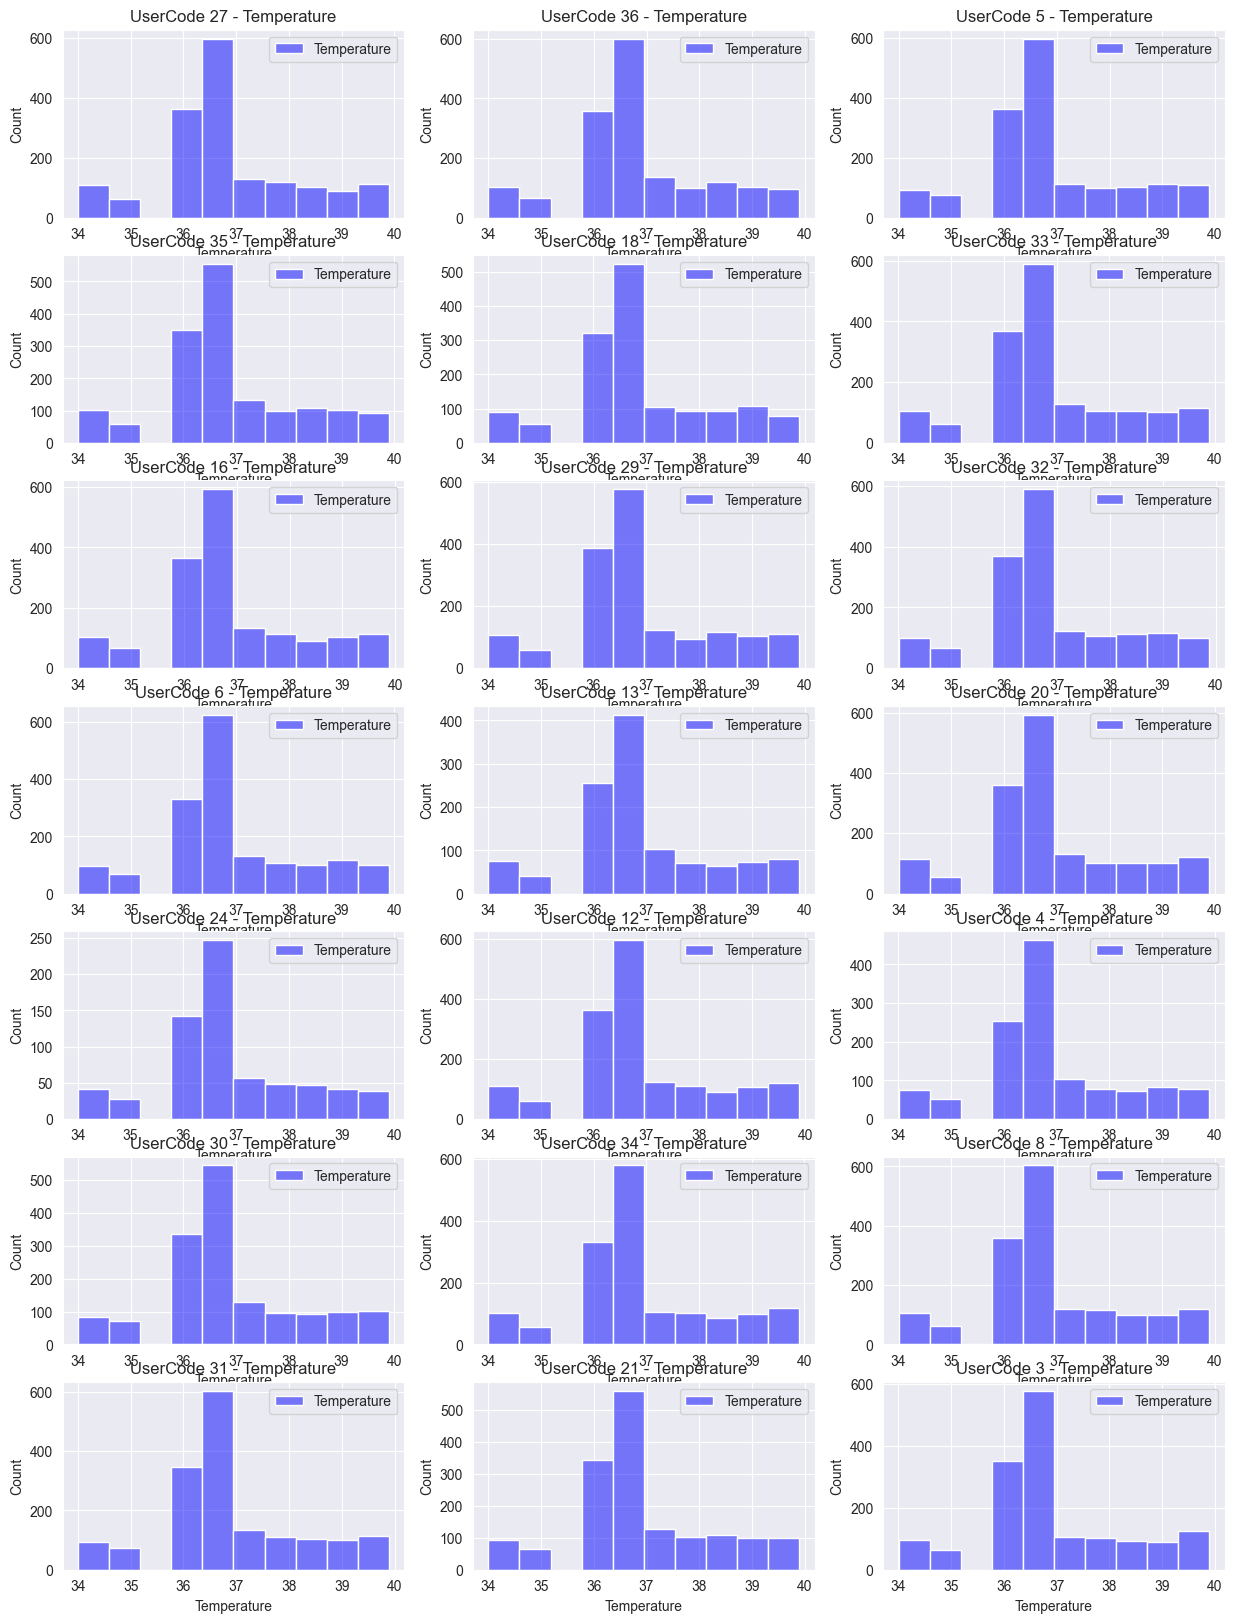

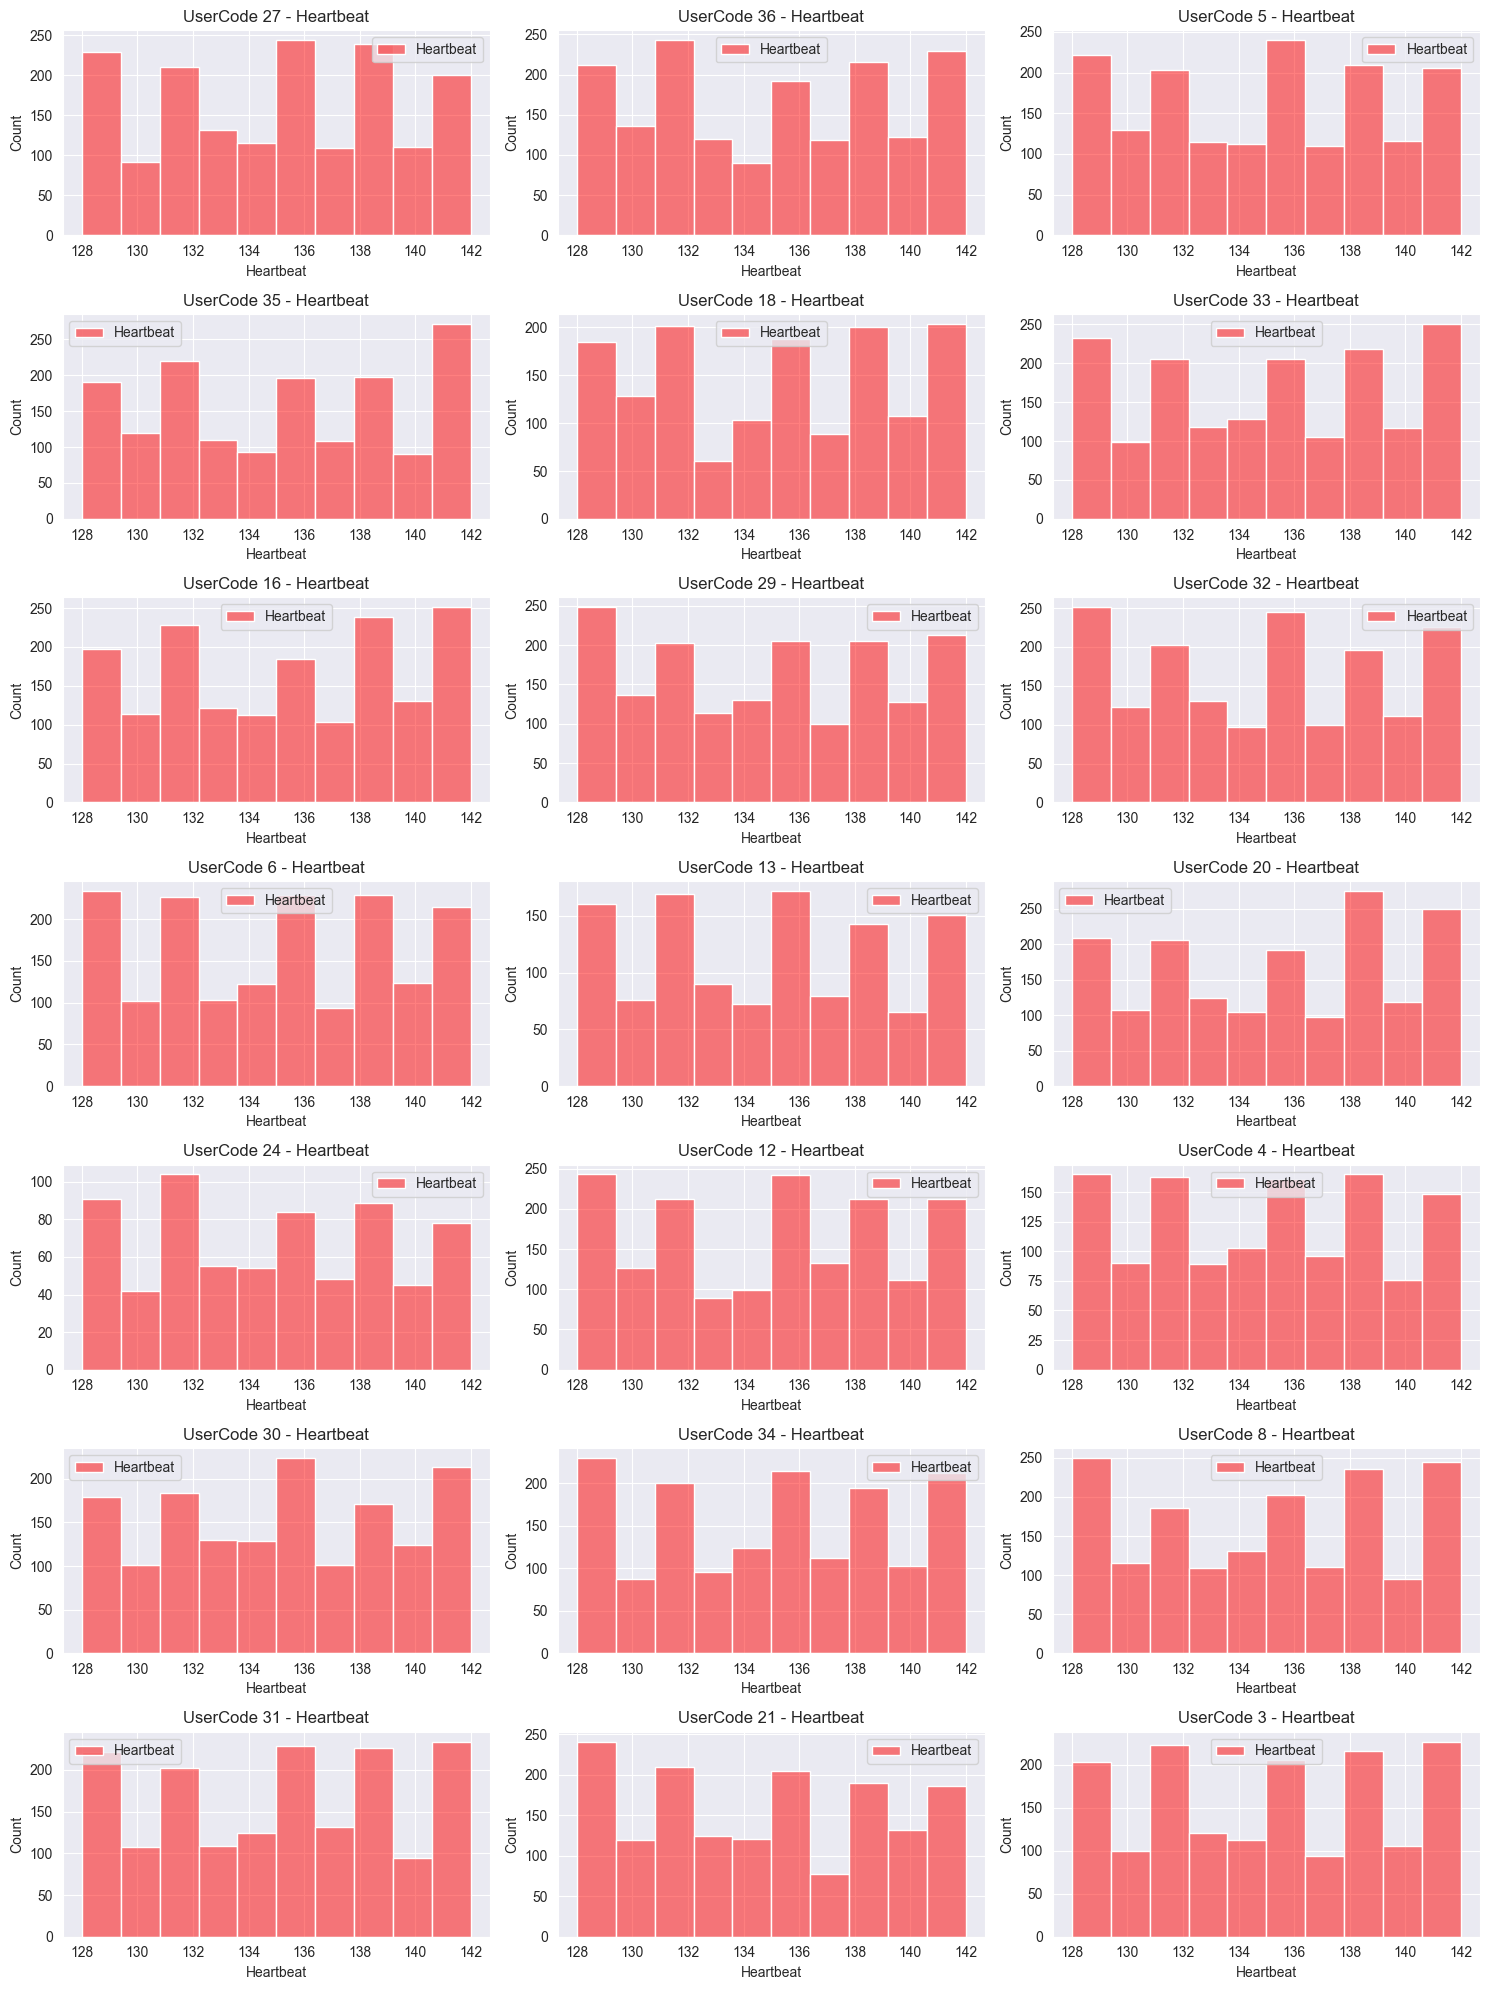

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# UserCode 별로 Temperature 히스토그램 그리기
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, user_code in enumerate(unique_user_codes):
    ax = axes[i]
    subset = updated_df[updated_df['UserCode'] == user_code]
    sns.histplot(subset['Temperature'], bins=10, ax=ax, color='blue', alpha=0.5, label='Temperature')
    ax.set_title(f'UserCode {user_code} - Temperature')
    ax.legend()

# UserCode 별로 Heartbeat 히스토그램 그리기
fig2, axes2 = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
axes2 = axes2.flatten()

for i, user_code in enumerate(unique_user_codes):
    ax = axes2[i]
    subset = updated_df[updated_df['UserCode'] == user_code]
    sns.histplot(subset['Heartbeat'], bins=10, ax=ax, color='red', alpha=0.5, label='Heartbeat')
    ax.set_title(f'UserCode {user_code} - Heartbeat')
    ax.legend()

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import numpy as np

# 데이터프레임 값 업데이트 함수
def update_dataframe(df):
    df['Heartbeat'] = np.random.randint(60, 85+1, size=len(df))
    return df

# 데이터프레임 값 업데이트
updated_df = update_dataframe(updated_df)

In [13]:
# UserCode 별로 비율 계산 및 출력
for user_code in unique_user_codes:
    subset = updated_df[updated_df['UserCode'] == user_code]
    temperature_34_35_ratio, temperature_36_37_ratio, temperature_37_39_ratio, heartbeat_45_55_ratio, heartbeat_60_85_ratio, heartbeat_100_140_ratio = calculate_ratio(subset)

    print(f"UserCode {user_code}의 비율:")
    print(f"Temperature 34.0~35.0: {temperature_34_35_ratio:.2%}")
    print(f"Temperature 36.0~37.0: {temperature_36_37_ratio:.2%}")
    print(f"Temperature 37.1~39.9: {temperature_37_39_ratio:.2%}")
    print(f"Heartbeat 45~55: {heartbeat_45_55_ratio:.2%}")
    print(f"Heartbeat 60~85: {heartbeat_60_85_ratio:.2%}")
    print(f"Heartbeat 100~140: {heartbeat_100_140_ratio:.2%}")
    print()

UserCode 27의 비율:
Temperature 34.0~35.0: 10.00%
Temperature 36.0~37.0: 60.00%
Temperature 37.1~39.9: 30.00%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 100.00%
Heartbeat 100~140: 0.00%

UserCode 36의 비율:
Temperature 34.0~35.0: 10.00%
Temperature 36.0~37.0: 60.00%
Temperature 37.1~39.9: 30.00%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 100.00%
Heartbeat 100~140: 0.00%

UserCode 5의 비율:
Temperature 34.0~35.0: 9.98%
Temperature 36.0~37.0: 60.01%
Temperature 37.1~39.9: 30.01%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 100.00%
Heartbeat 100~140: 0.00%

UserCode 35의 비율:
Temperature 34.0~35.0: 9.96%
Temperature 36.0~37.0: 60.05%
Temperature 37.1~39.9: 29.99%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 100.00%
Heartbeat 100~140: 0.00%

UserCode 18의 비율:
Temperature 34.0~35.0: 9.96%
Temperature 36.0~37.0: 60.03%
Temperature 37.1~39.9: 30.01%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 100.00%
Heartbeat 100~140: 0.00%

UserCode 33의 비율:
Temperature 34.0~35.0: 10.00%
Temperature 36.0~37.0: 60.00%
Temperature 37.1~39.9:

In [14]:
def update_heartbeat(subset):
    total_count = len(subset)
    subset_copy = subset.copy()

    # Temperature가 37.1이상 40미만인 경우
    temperature_37_40 = subset_copy[(subset_copy['Temperature'] >= 37.1) & (subset_copy['Temperature'] < 40)]
    heartbeat_37_40_count = int(len(temperature_37_40) * 0.4)
    heartbeat_37_40_subset = temperature_37_40.sample(n=heartbeat_37_40_count)
    heartbeat_37_40_subset['Heartbeat'] = np.random.randint(100, 140+1, size=heartbeat_37_40_count)
    subset_copy.update(heartbeat_37_40_subset)

    # Temperature가 36.0이상 37.0미만인 경우
    temperature_36_37 = subset_copy[(subset_copy['Temperature'] >= 36.0) & (subset_copy['Temperature'] < 37.1)]
    heartbeat_36_37_count = int(len(temperature_36_37) * 0.3)
    heartbeat_36_37_subset = temperature_36_37.sample(n=heartbeat_36_37_count)
    heartbeat_36_37_subset['Heartbeat'] = np.random.randint(100, 140+1, size=heartbeat_36_37_count)
    subset_copy.update(heartbeat_36_37_subset)

    # Temperature가 34.0이상 35.0미만인 경우
    temperature_34_35 = subset_copy[(subset_copy['Temperature'] >= 34.0) & (subset_copy['Temperature'] < 35.1)]
    heartbeat_34_35_count = int(len(temperature_34_35) * 0.4)
    heartbeat_34_35_subset = temperature_34_35.sample(n=heartbeat_34_35_count)
    heartbeat_34_35_subset['Heartbeat'] = np.random.randint(45, 55+1, size=heartbeat_34_35_count)
    subset_copy.update(heartbeat_34_35_subset)

    return subset_copy


def update_dataframe(df):
    unique_user_codes = df['UserCode'].unique()

    updated_dfs = []
    for user_code in unique_user_codes:
        subset = df[df['UserCode'] == user_code]
        updated_subset = update_heartbeat(subset)
        updated_dfs.append(updated_subset)

    updated_df = pd.concat(updated_dfs)
    updated_df.reset_index(drop=True, inplace=True)
    return updated_df

# 데이터프레임 값 업데이트
updated_df = update_dataframe(updated_df)

# 업데이트된 데이터프레임 확인
print(updated_df)


          No  Heartbeat  Temperature  Spo2  UserCode  GyroX  GyroY     GyroZ   
0      54260        105    39.749752    96         3   1.33  -0.04  9.660000  \
1      54291        113    37.789444    99         3   1.31  -0.08  9.700000   
2      53509        102    39.212428    99         3   1.57   0.23  9.620000   
3      53712         72    38.075434    95         3   1.50   0.23  9.660000   
4      53676        102    37.680269    97         3   1.50   0.27  9.700000   
...      ...        ...          ...   ...       ...    ...    ...       ...   
32666   3109         79    34.277755    97        36  -4.75  -2.18  8.076866   
32667   2597         55    34.924367    98        36  -4.99  -2.30  7.818079   
32668   3867         49    34.596745    98        36  -4.29  -2.26  8.240311   
32669   2921         63    34.952473    95        36  -4.94  -2.26  7.967904   
32670   3718         55    34.147276    95        36  -4.29  -2.26  8.199450   

      Label  
0      fall  
1      fall

In [15]:
# UserCode 별로 비율 계산 및 출력
for user_code in unique_user_codes:
    subset = updated_df[updated_df['UserCode'] == user_code]
    temperature_34_35_ratio, temperature_36_37_ratio, temperature_37_39_ratio, heartbeat_45_55_ratio, heartbeat_60_85_ratio, heartbeat_100_140_ratio = calculate_ratio(subset)

    print(f"UserCode {user_code}의 비율:")
    print(f"Temperature 34.0~35.0: {temperature_34_35_ratio:.2%}")
    print(f"Temperature 36.0~37.0: {temperature_36_37_ratio:.2%}")
    print(f"Temperature 37.1~39.9: {temperature_37_39_ratio:.2%}")
    print(f"Heartbeat 45~55: {heartbeat_45_55_ratio:.2%}")
    print(f"Heartbeat 60~85: {heartbeat_60_85_ratio:.2%}")
    print(f"Heartbeat 100~140: {heartbeat_100_140_ratio:.2%}")
    print()

UserCode 27의 비율:
Temperature 34.0~35.0: 8.93%
Temperature 36.0~37.0: 56.61%
Temperature 37.1~39.9: 34.46%
Heartbeat 45~55: 4.58%
Heartbeat 60~85: 53.99%
Heartbeat 100~140: 41.43%

UserCode 36의 비율:
Temperature 34.0~35.0: 10.00%
Temperature 36.0~37.0: 55.36%
Temperature 37.1~39.9: 34.64%
Heartbeat 45~55: 5.36%
Heartbeat 60~85: 54.29%
Heartbeat 100~140: 40.36%

UserCode 5의 비율:
Temperature 34.0~35.0: 9.56%
Temperature 36.0~37.0: 55.56%
Temperature 37.1~39.9: 34.88%
Heartbeat 45~55: 5.11%
Heartbeat 60~85: 54.24%
Heartbeat 100~140: 40.65%

UserCode 35의 비율:
Temperature 34.0~35.0: 9.39%
Temperature 36.0~37.0: 55.29%
Temperature 37.1~39.9: 35.32%
Heartbeat 45~55: 5.07%
Heartbeat 60~85: 53.04%
Heartbeat 100~140: 41.89%

UserCode 18의 비율:
Temperature 34.0~35.0: 8.73%
Temperature 36.0~37.0: 56.21%
Temperature 37.1~39.9: 35.06%
Heartbeat 45~55: 4.50%
Heartbeat 60~85: 53.89%
Heartbeat 100~140: 41.61%

UserCode 33의 비율:
Temperature 34.0~35.0: 9.23%
Temperature 36.0~37.0: 57.08%
Temperature 37.1~39.9: 3

In [16]:
updated_df.to_csv('../data/updated_data_fall.csv', index=False)
print("데이터가 성공적으로 저장되었습니다.")

데이터가 성공적으로 저장되었습니다.


In [17]:
import os
import pandas as pd

directory = "../data"
df_adl = pd.DataFrame()

# 디렉토리 내의 모든 파일 검색
for filename in os.listdir(directory):
    if filename.endswith(".csv") and "updated" not in filename and "fall" not in filename and "all" not in filename:
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df_adl = pd.concat([df_adl, df])

# 결과 출력
print(df_adl)

            No  Heartbeat  Temperature  Spo2  UserCode     GyroX      GyroY   
0            1      108.0         36.6  95.0      33.0 -0.040861   4.985047  \
1            2      109.0         36.7  99.0      33.0 -0.463092   4.372132   
2            3      111.0         36.6  98.0      33.0 -0.299648   4.603678   
3            4      108.0         36.6  97.0      33.0 -0.272407   4.481094   
4            5      110.0         36.6  98.0      33.0 -1.525479   5.175732   
...        ...        ...          ...   ...       ...       ...        ...   
406772  406773      133.0         36.8  96.0       7.0  2.140000   8.470000   
406773  406774      131.0         36.7  95.0       7.0  6.090000   4.860000   
406774  406775      142.0         36.8  96.0       7.0  5.010000   9.700000   
406775  406776      136.0         36.6  96.0       7.0  4.140000  11.030000   
406776  406777        NaN          NaN   NaN       NaN       NaN        NaN   

           GyroZ          Time       Label  
0     

In [18]:
df_adl = df_adl.reset_index()
print(df_adl)

         index      No  Heartbeat  Temperature  Spo2  UserCode     GyroX   
0            0       1      108.0         36.6  95.0      33.0 -0.040861  \
1            1       2      109.0         36.7  99.0      33.0 -0.463092   
2            2       3      111.0         36.6  98.0      33.0 -0.299648   
3            3       4      108.0         36.6  97.0      33.0 -0.272407   
4            4       5      110.0         36.6  98.0      33.0 -1.525479   
...        ...     ...        ...          ...   ...       ...       ...   
993695  406772  406773      133.0         36.8  96.0       7.0  2.140000   
993696  406773  406774      131.0         36.7  95.0       7.0  6.090000   
993697  406774  406775      142.0         36.8  96.0       7.0  5.010000   
993698  406775  406776      136.0         36.6  96.0       7.0  4.140000   
993699  406776  406777        NaN          NaN   NaN       NaN       NaN   

            GyroY     GyroZ          Time       Label  
0        4.985047  6.510526  4.

In [19]:
# Time 필드 드랍
sampled_df_adl = df_adl.drop('Time', axis=1)

# 업데이트된 데이터프레임 확인
print(sampled_df_adl)

         index      No  Heartbeat  Temperature  Spo2  UserCode     GyroX   
0            0       1      108.0         36.6  95.0      33.0 -0.040861  \
1            1       2      109.0         36.7  99.0      33.0 -0.463092   
2            2       3      111.0         36.6  98.0      33.0 -0.299648   
3            3       4      108.0         36.6  97.0      33.0 -0.272407   
4            4       5      110.0         36.6  98.0      33.0 -1.525479   
...        ...     ...        ...          ...   ...       ...       ...   
993695  406772  406773      133.0         36.8  96.0       7.0  2.140000   
993696  406773  406774      131.0         36.7  95.0       7.0  6.090000   
993697  406774  406775      142.0         36.8  96.0       7.0  5.010000   
993698  406775  406776      136.0         36.6  96.0       7.0  4.140000   
993699  406776  406777        NaN          NaN   NaN       NaN       NaN   

            GyroY     GyroZ       Label  
0        4.985047  6.510526  Downstairs  
1  

In [20]:
import numpy as np

# 데이터프레임 값 업데이트 함수
def update_dataframe(df):
    df['Heartbeat'] = np.random.randint(60, 85+1, size=len(df))
    return df

# 데이터프레임 값 업데이트
updated_df_adl = update_dataframe(sampled_df_adl)

print(updated_df_adl)

         index      No  Heartbeat  Temperature  Spo2  UserCode     GyroX   
0            0       1         62         36.6  95.0      33.0 -0.040861  \
1            1       2         76         36.7  99.0      33.0 -0.463092   
2            2       3         74         36.6  98.0      33.0 -0.299648   
3            3       4         73         36.6  97.0      33.0 -0.272407   
4            4       5         78         36.6  98.0      33.0 -1.525479   
...        ...     ...        ...          ...   ...       ...       ...   
993695  406772  406773         67         36.8  96.0       7.0  2.140000   
993696  406773  406774         64         36.7  95.0       7.0  6.090000   
993697  406774  406775         67         36.8  96.0       7.0  5.010000   
993698  406775  406776         70         36.6  96.0       7.0  4.140000   
993699  406776  406777         78          NaN   NaN       NaN       NaN   

            GyroY     GyroZ       Label  
0        4.985047  6.510526  Downstairs  
1  

In [21]:
updated_df_adl = updated_df_adl.dropna()

In [22]:
print(updated_df_adl)

         index      No  Heartbeat  Temperature  Spo2  UserCode     GyroX   
0            0       1         62         36.6  95.0      33.0 -0.040861  \
1            1       2         76         36.7  99.0      33.0 -0.463092   
2            2       3         74         36.6  98.0      33.0 -0.299648   
3            3       4         73         36.6  97.0      33.0 -0.272407   
4            4       5         78         36.6  98.0      33.0 -1.525479   
...        ...     ...        ...          ...   ...       ...       ...   
993694  406771  406772         85         36.6  99.0       7.0  5.520000   
993695  406772  406773         67         36.8  96.0       7.0  2.140000   
993696  406773  406774         64         36.7  95.0       7.0  6.090000   
993697  406774  406775         67         36.8  96.0       7.0  5.010000   
993698  406775  406776         70         36.6  96.0       7.0  4.140000   

            GyroY     GyroZ       Label  
0        4.985047  6.510526  Downstairs  
1  

In [23]:
# 파일 저장
output_file = "../data/updated_data_adl.csv"
updated_df_adl.to_csv(output_file, index=False)

# 저장 완료 메시지 출력
print(f"데이터가 성공적으로 저장되었습니다. 파일 경로: {output_file}")

데이터가 성공적으로 저장되었습니다. 파일 경로: ../data/updated_data_adl.csv


In [24]:
import pandas as pd

file_path = "../data/updated_data_fall.csv"
df_fall = pd.read_csv(file_path)

# 결과 출력
print(df_fall)

          No  Heartbeat  Temperature  Spo2  UserCode  GyroX  GyroY     GyroZ   
0      54260        105    39.749752    96         3   1.33  -0.04  9.660000  \
1      54291        113    37.789444    99         3   1.31  -0.08  9.700000   
2      53509        102    39.212428    99         3   1.57   0.23  9.620000   
3      53712         72    38.075434    95         3   1.50   0.23  9.660000   
4      53676        102    37.680269    97         3   1.50   0.27  9.700000   
...      ...        ...          ...   ...       ...    ...    ...       ...   
32666   3109         79    34.277755    97        36  -4.75  -2.18  8.076866   
32667   2597         55    34.924367    98        36  -4.99  -2.30  7.818079   
32668   3867         49    34.596745    98        36  -4.29  -2.26  8.240311   
32669   2921         63    34.952473    95        36  -4.94  -2.26  7.967904   
32670   3718         55    34.147276    95        36  -4.29  -2.26  8.199450   

      Label  
0      fall  
1      fall

In [25]:
import pandas as pd

# 데이터프레임 합치기
updated_df_adl = pd.concat([updated_df_adl, df_fall], ignore_index=True)

# 파일 저장
output_file = "../data/adl_fall_all.csv"
updated_df_adl.to_csv(output_file, index=False)

# 저장 완료 메시지 출력
print(f"데이터가 성공적으로 저장되었습니다. 파일 경로: {output_file}")

데이터가 성공적으로 저장되었습니다. 파일 경로: ../data/adl_fall_all.csv


In [26]:
import pandas as pd

file_path = "../data/adl_fall_all.csv"
df_all = pd.read_csv(file_path)

# 결과 출력
print(df_all)

         index    No  Heartbeat  Temperature  Spo2  UserCode     GyroX   
0          0.0     1         62    36.600000  95.0      33.0 -0.040861  \
1          1.0     2         76    36.700000  99.0      33.0 -0.463092   
2          2.0     3         74    36.600000  98.0      33.0 -0.299648   
3          3.0     4         73    36.600000  97.0      33.0 -0.272407   
4          4.0     5         78    36.600000  98.0      33.0 -1.525479   
...        ...   ...        ...          ...   ...       ...       ...   
1026364    NaN  3109         79    34.277755  97.0      36.0 -4.750000   
1026365    NaN  2597         55    34.924367  98.0      36.0 -4.990000   
1026366    NaN  3867         49    34.596745  98.0      36.0 -4.290000   
1026367    NaN  2921         63    34.952473  95.0      36.0 -4.940000   
1026368    NaN  3718         55    34.147276  95.0      36.0 -4.290000   

            GyroY     GyroZ       Label  
0        4.985047  6.510526  Downstairs  
1        4.372132  7.436710

In [27]:
# Label 필드의 속성별 개수 구하기
label_counts = df_all['Label'].value_counts()

# 결과 출력
print(label_counts)

Label
Walking       406775
Jogging       325975
Upstairs      118589
Downstairs     97813
Standing       44546
fall           32671
Name: count, dtype: int64
